 Import Necessaries

In [38]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


 Setting the Enviroment

In [39]:
train_data_path = '/kaggle/input/dataset/train'
test_data_path = '/kaggle/input/dataset/test'
valid_data_path = '/kaggle/input/dataset/val'

In [40]:
labels = os.listdir(valid_data_path)

Creating data working directory

In [41]:
data_path = '/kaggle/working/data'

if not os.path.exists(data_path):
    os.mkdir(data_path)
    print("Created Succesfulley!")
else:
    print("Folder already exist")

Folder already exist


In [42]:
normal_data_path = '/kaggle/working/data/Normal'
oscc_data_path = '/kaggle/working/data/OSCC'

if not os.path.exists(normal_data_path):
    os.mkdir(normal_data_path)
    print("Created Succesfulley!")
else:
    print("Folder already exist")
    
if not os.path.exists(oscc_data_path):
    os.mkdir(oscc_data_path)
    print("Created Succesfulley!")
else:
    print("Folder already exist")

Folder already exist
Folder already exist


Moving all the images to the data working directory

In [43]:
def move_data(d_path, saved_path):
    for i in labels:
        images = os.listdir(d_path + '/' + i)
        for j in images:
            path = d_path +'/' + i
            img = cv2.imread(path + '/' + j)
            s_path = saved_path + '/' + i + '/' + j
            cv2.imwrite(s_path, img)

In [44]:
move_data(train_data_path, data_path)

In [45]:
norm_path = len(os.listdir(data_path + '/' + labels[0]))
oscc_path = len(os.listdir(data_path + '/' + labels[1]))
print(norm_path+oscc_path)

5192


In [46]:
move_data(test_data_path, data_path)

In [47]:
norm_path = len(os.listdir(data_path + '/' + labels[0]))
oscc_path = len(os.listdir(data_path + '/' + labels[1]))
print(norm_path+oscc_path)

5192


In [48]:
move_data(valid_data_path, data_path)

In [49]:
norm_path = len(os.listdir(data_path + '/' + labels[0]))
oscc_path = len(os.listdir(data_path + '/' + labels[1]))
print(norm_path+oscc_path)

5192


 EDA

In [50]:
def main(train_data_path):
    
    """
    return training and testing dataframes including 2 columns image path and its label
    
    Args:
      train_data_path (string): string includes your train data path
      test_data_path (string): string includes your test data path
      note: data_path argument must contains your classes dirs
      
    Returns:
      train_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the training images and the label of each image
      test_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the testing images and the label of each image

    """
    
    for dirs in [train_data_path]:

        filepaths = []
        labels = []
        classes_list = sorted(os.listdir(dirs))

        filepaths,labels = get_fileList(classes_list, dirs, filepaths, labels)
        
        train_df = obtain_train_df(filepaths, labels)
        
            
    return train_df



def get_fileList(classes_list, dirs, filepaths, labels):
    
    
    """
    return file paths list including all full image paths and label for each one
    
    Args:
      classes_list (list): list includes name of classes dirs
      dirs (string): the data path
      filepaths (list): empty list to fill with images paths later
      labels (list): empty list to fill with each image label later
      
    Returns:
      count (scalar):  number of images in your dataset
    """
    
    
    for s_class in classes_list:
        
        label = s_class
        classpath = os.path.join(dirs, s_class)
        flist = sorted(os.listdir(classpath))
        
        store_image_names_and_its_labels(flist, classpath, filepaths, labels, label)
        
    return filepaths, labels


def store_image_names_and_its_labels(flist, classpath, filepaths, labels, label):
    
    """
    return nothing, it fills the filepaths list with all the images paths and its labels
    
    Args:
      flist (list) : contains all the image names in certain class
      classes_list (list): list includes name of classes dirs
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset
      label (string): label for a specific image
      
    Returns:
      nothing
    """
    
    
    for file in flist:
        file_path = os.path.join(classpath, file)
        filepaths.append(file_path)
        labels.append(label)



def obtain_train_df(filepaths, labels):
    
    """
    Return Dataframe with 2 columns contains each image path with its label
    
    Args:
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset
      
    Returns:
      train_df (DataFrame):  Dataframe with 2 columns contains each image path with its label
    """
    
    train_df =pd.DataFrame({
        'image_path' : filepaths,
        'label' : labels
    })
    return train_df

In [51]:
data_df = main(data_path)
data_df.head()

image_path   label
0   /kaggle/working/data/Normal/Normal_100x_1.jpg  Normal
1  /kaggle/working/data/Normal/Normal_100x_10.jpg  Normal
2  /kaggle/working/data/Normal/Normal_100x_11.jpg  Normal
3  /kaggle/working/data/Normal/Normal_100x_12.jpg  Normal
4  /kaggle/working/data/Normal/Normal_100x_13.jpg  Normal

In [52]:
print("Shape of the dataset: ", data_df.shape)
print("\n")
print("_______________________________________")
print("Number of null values: ")
print(data_df.isnull().sum())
print("\n")
print("_______________________________________")
print("Number of unique values: ")
print(data_df.nunique())

Shape of the dataset:  (5192, 2)


_______________________________________
Number of null values: 
image_path    0
label         0
dtype: int64


_______________________________________
Number of unique values: 
image_path    5192
label            2
dtype: int64


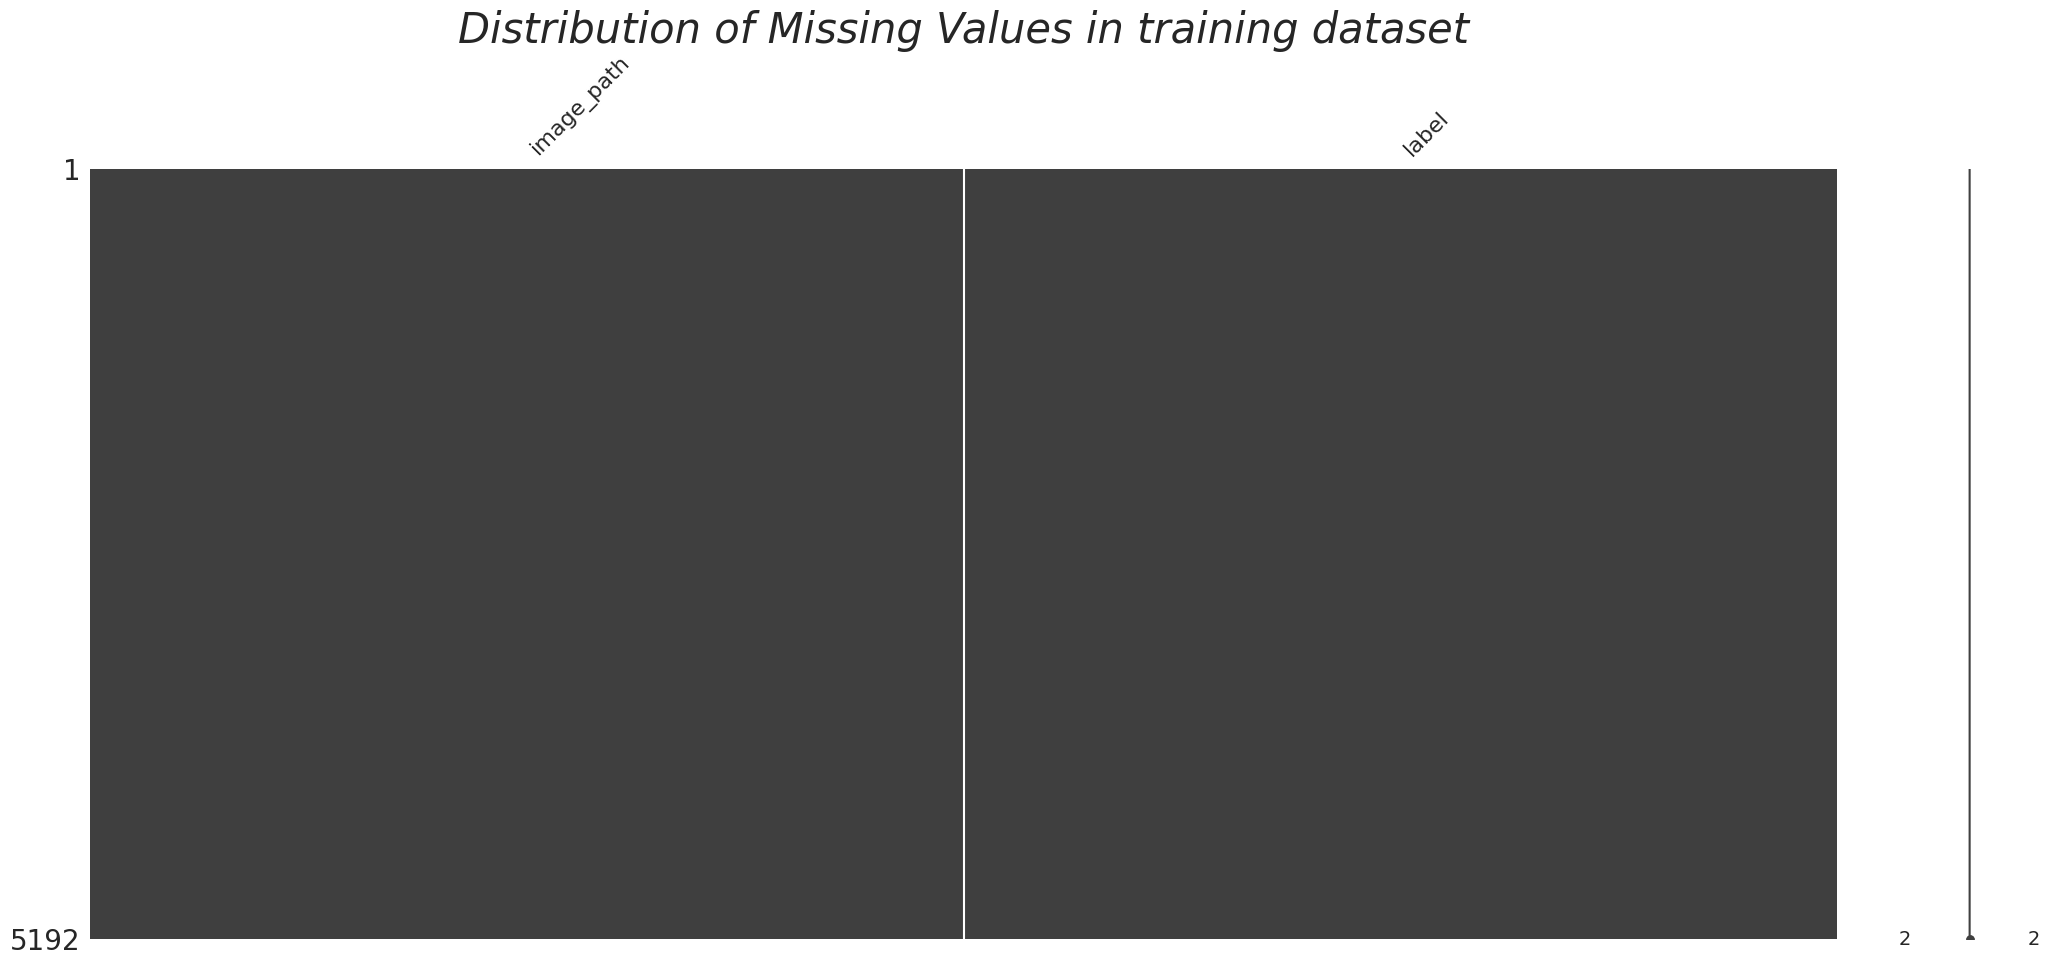

In [53]:
msno.matrix(data_df)
plt.title('Distribution of Missing Values in training dataset', fontsize=30, fontstyle='oblique');

In [54]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

In [55]:
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

In [56]:
cat_summary_with_graph(data_df,'label')

**The data is Balanced**

<a id="5"></a>
## <b>5 <span style='color:#B21010'>||</span> Create Needed Functions</b>

<a id="5.1"></a>
### <b>5.1 <span style='color:#B21010'>||</span> Functions to Load data in lists and create dataframe</b>

In [57]:
# Generate data paths with labels
def define_paths(dir):
    
    filepaths = []
    labels = []

    folds = os.listdir(dir)
    for fold in folds:
        foldpath = os.path.join(dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

    return filepaths, labels


# Concatenate data paths with labels into one dataframe ( to later be fitted into the model )
def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)


<a id="5.2"></a>
### <b>5.2 <span style='color:#B21010'>||</span> Functions to split dataset into train, test and valid datasets</b>

In [58]:
# Function that contain only a directory of data and it is not splitted
def tr_ts_data(tr_dir, ts_dir):
    # train and valid dataframe
    files, classes = define_paths(tr_dir)
    df = define_df(files, classes)
    strat = df['labels']
    train_df, valid_df = train_test_split(df, train_size= 0.7, shuffle= True, random_state= 123, stratify= strat)

    # test dataframe
    files, classes = define_paths(tr_dir)
    test_df = define_df(files, classes)
    return train_df, valid_df, test_df

# Function that contain train and test directory of data.
def full_data(data_dir):
    # train dataframe
    files, classes = define_paths(data_dir)
    df = define_df(files, classes)
    strat = df['labels']
    train_df, dummy_df = train_test_split(df,  train_size= 0.7, shuffle= True, random_state= 123, stratify= strat)

    # valid and test dataframe
    strat = dummy_df['labels']
    valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123, stratify= strat)

    return train_df, valid_df, test_df


# function that contain the three directory of data train, valid, and test
def tr_val_ts_data(tr_dir, val_dir, ts_dir):

    # train dataframe
    files, classes = define_paths(tr_dir)
    train_df = define_df(files, classes)

    # validation dataframe
    files, classes = define_paths(val_dir)
    valid_df = define_df(files, classes)

    # test dataframe
    files, classes = define_paths(ts_dir)
    test_df = define_df(files, classes)

    return train_df, valid_df, test_df

In [59]:
def split_data(tr_dir, val_dir=None, ts_dir=None):
    '''
        This function split data into train, valid, and test after convert it to a dataframe.
        Dataset can be in several formats, it can contain train, valid, and test data, or it can contain only train and test data, etc.
        It depends on other needed function:
        - full_data function that contain only a directory of data and it is not splitted.
        - tr_ts_data function that contain train and test directory of data.
        - tr_val_ts_data function that contain the three directory of data train, valid, and test.
    '''

    # No Validation or Test data
    if val_dir == '' and ts_dir == '':
        train_df, valid_df, test_df = full_data(tr_dir)
        return train_df, valid_df, test_df

    # No Validation data
    elif val_dir == '' and ts_dir != '':
        train_df, valid_df, test_df = tr_ts_data(tr_dir, ts_dir)
        return train_df, valid_df, test_df

    # All data existed
    elif val_dir != '' and ts_dir != '':
        train_df, valid_df, test_df = tr_val_ts_data(tr_dir, val_dir, ts_dir)
        return train_df, valid_df, test_df

 Function to create generator for the datasets

In [60]:
def create_model_data (train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors. '''


    # define model parameters
    img_size = (224, 224)
    channels = 3 # either BGR or Grayscale
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)

    # Recommended : use custom function for test data batch size, else we can use normal batch size.
    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    # This function which will be used in image data generator for data augmentation, it just take the image and return it again.
    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function= scalar, 
                                horizontal_flip= True,
)
    
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)

    train_gen = tr_gen.flow_from_dataframe( train_df, 
                                           x_col= 'filepaths', 
                                           y_col= 'labels', 
                                           target_size= img_size, 
                                           class_mode= 'categorical',
                                           color_mode= color, 
                                           shuffle= True, 
                                           batch_size= batch_size)

    valid_gen = ts_gen.flow_from_dataframe( valid_df, 
                                           x_col= 'filepaths', 
                                           y_col= 'labels', 
                                           target_size= img_size, 
                                           class_mode= 'categorical',
                                           color_mode= color, 
                                           shuffle= True, 
                                           batch_size= batch_size)

    # Note: we will use custom test_batch_size, and make shuffle= false
    test_gen = ts_gen.flow_from_dataframe( test_df, 
                                          x_col= 'filepaths', 
                                          y_col= 'labels', 
                                          target_size= img_size, 
                                          class_mode= 'categorical',
                                          color_mode= color, 
                                          shuffle= False, 
                                          batch_size= test_batch_size)

    return train_gen, valid_gen, test_gen

 Function to plot samples of our data

In [61]:
def show_images(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

 Function to Plot Acc and Loss Curves

In [62]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

 Split the Data and Create Generators

In [63]:
train_dir = data_path
valid_dir = ""
test_dir = ""

try:
    # Get splitted data
    train_df, valid_df, test_df = split_data(train_dir, valid_dir, test_dir)

    # Get Generators
    batch_size = 128
    train_gen, valid_gen, test_gen = create_model_data(train_df, valid_df, test_df, batch_size)

except:
    print('Invalid Input')

Found 3634 validated image filenames belonging to 2 classes.
Found 779 validated image filenames belonging to 2 classes.
Found 779 validated image filenames belonging to 2 classes.


 Plot sample of the data

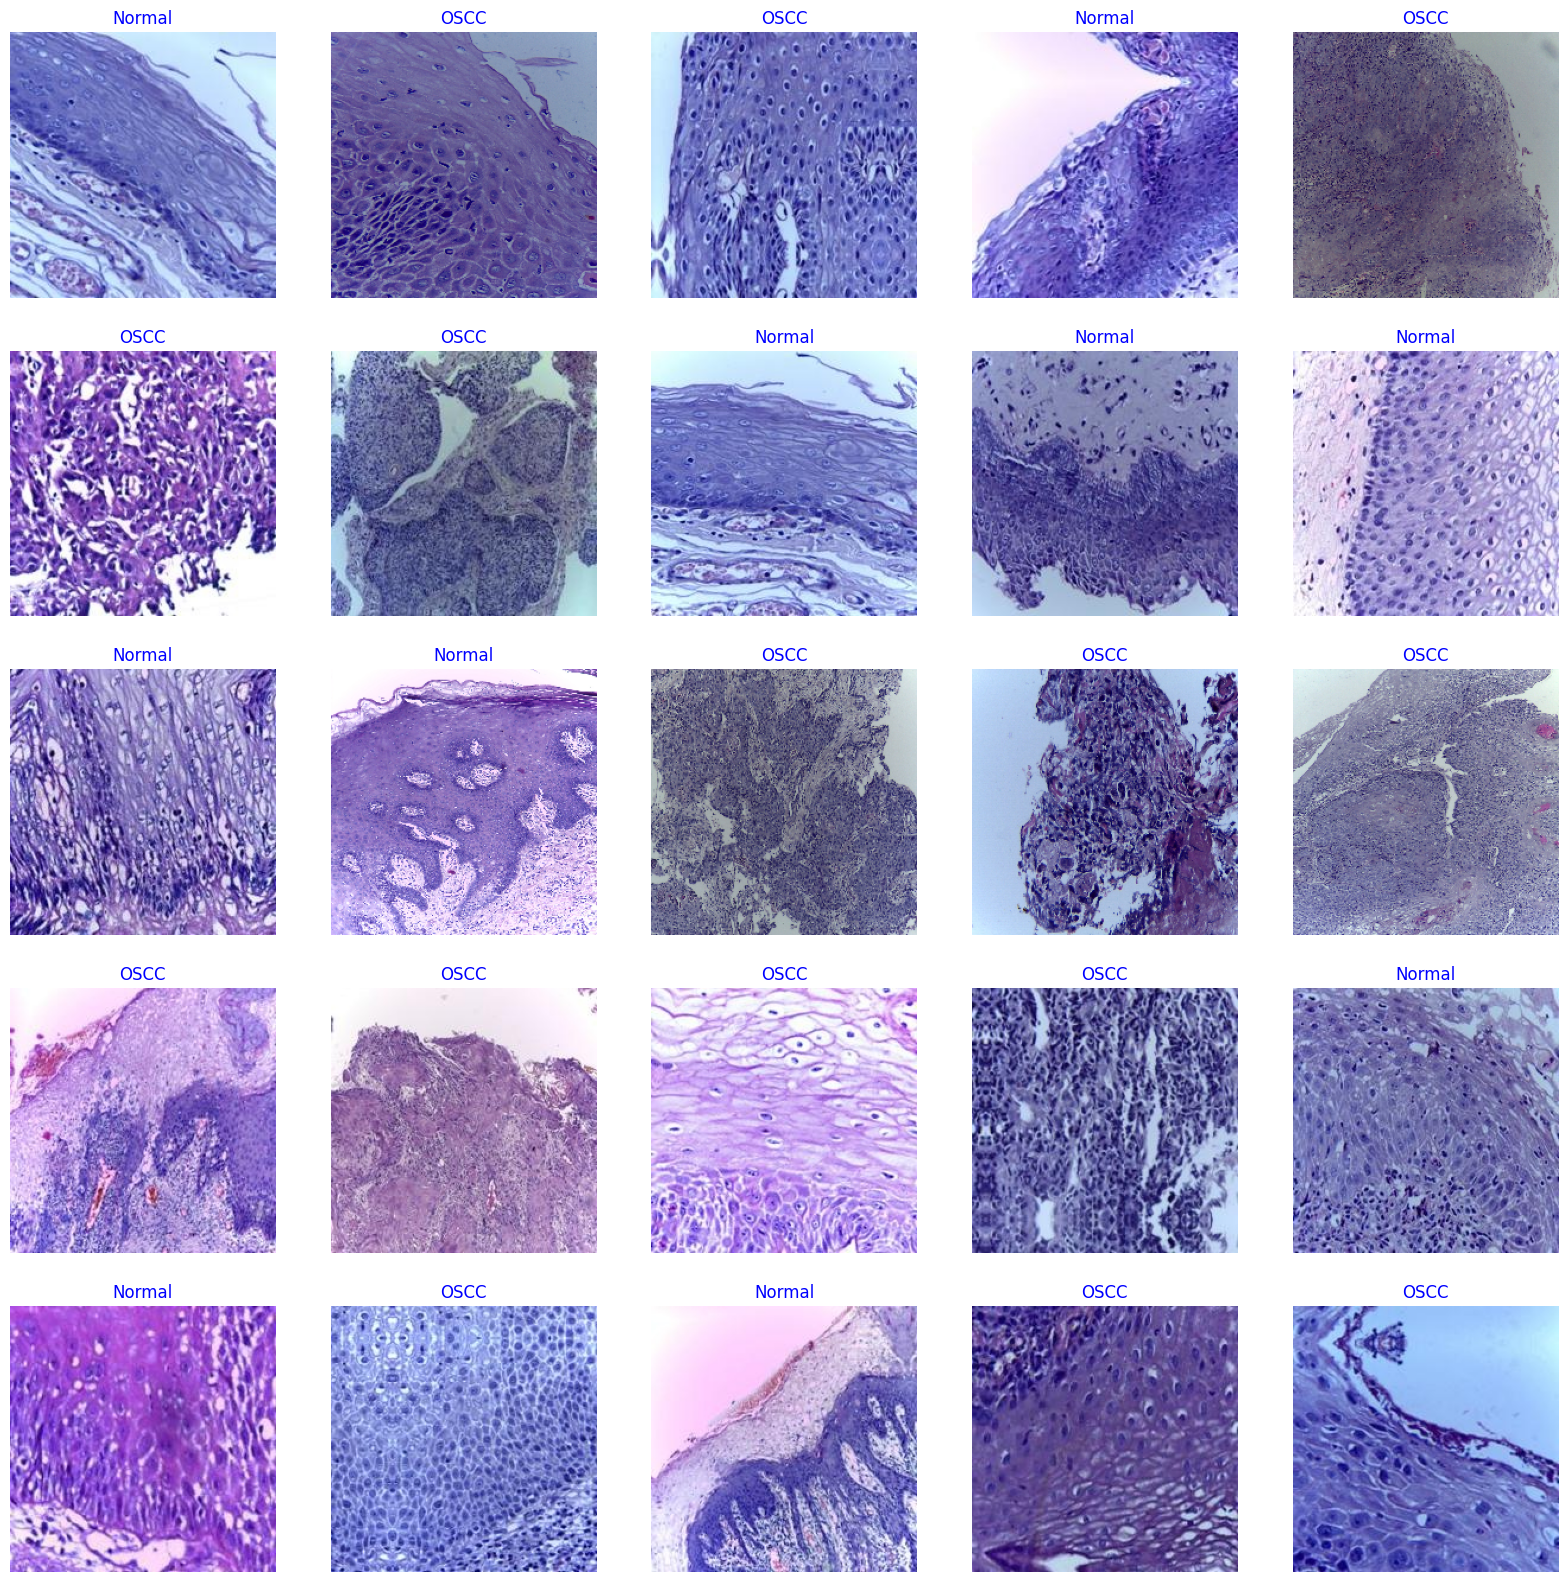

In [64]:
show_images(train_gen)

Model Structure

Load the pretrained model, add layers to the base model, compile the model and finally summary the architecture of the model

In [65]:
# Create Model Structure
# Here we are creating both efficient net and resnet 50 model ,and try ensembling them
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

efficentNet_model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

efficentNet_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

efficentNet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization_2 (Bat  (None, 1536)              6144      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               393472    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 11183665 (42.66 MB)
Trainable params: 11

In [66]:
# Ensembling the resnet50 and efficientnet model
from tensorflow.keras.layers import Input, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adamax

# Assuming you have a ResNet-50 base model
base_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=img_shape, pooling='max')

# Freeze the layers in the base model
for layer in base_resnet50.layers:
    layer.trainable = False

# Build the ResNet-50 model
resnet50_model = Sequential([
    base_resnet50,
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(class_count, activation='softmax')
])

# Compile the ResNet-50 model
resnet50_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
resnet50_model.summary()

# Now you can use the code for ensembling
# Input layer
input_layer = Input(shape=img_shape)

# Get the output of each model
efficientnet_output = efficentNet_model(input_layer)
resnet50_output = resnet50_model(input_layer)

# Define weights for the ensemble
weight_efficientnet = 0.7
weight_resnet50 = 0.3

# Combine predictions with weighted voting
ensemble_output = weight_efficientnet * efficientnet_output + weight_resnet50 * resnet50_output

# Create the ensemble model
ensemble_model = Model(inputs=input_layer, outputs=ensemble_output)

# Compile the ensemble model
ensemble_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ensemble_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_3 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
Total params: 24120962 (92.01 MB)
Trainable params: 529154 (2.02 MB)
Non-trainable params: 23591808 (90.00 MB)
_________

Tuning

In [67]:
checkpoint_path = '/kaggle/working/checkpoint'
if not os.path.exists(checkpoint_path):
    os.mkdir(checkpoint_path)
    print("Folder Created Successfully!!")
else:
    print("Folder Already Exist!!")

Folder Already Exist!!


In [68]:
batch_size = 128   # set batch size for training
epochs = 20   # number of all epochs in training
patience = 2   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 2   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

early_stopping = callbacks.EarlyStopping(
        patience=2,
        min_delta=0,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
        baseline=None,
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

Train the model

In [74]:
history = ensemble_model.fit(x= train_gen, epochs= epochs, verbose= 1, callbacks= [early_stopping,plateau],
                    validation_data = valid_gen, validation_steps= None, shuffle= False)

TypeError: unsupported operand type(s) for -: 'range' and 'int'

 model evaluation

Plot Acc and loss curves

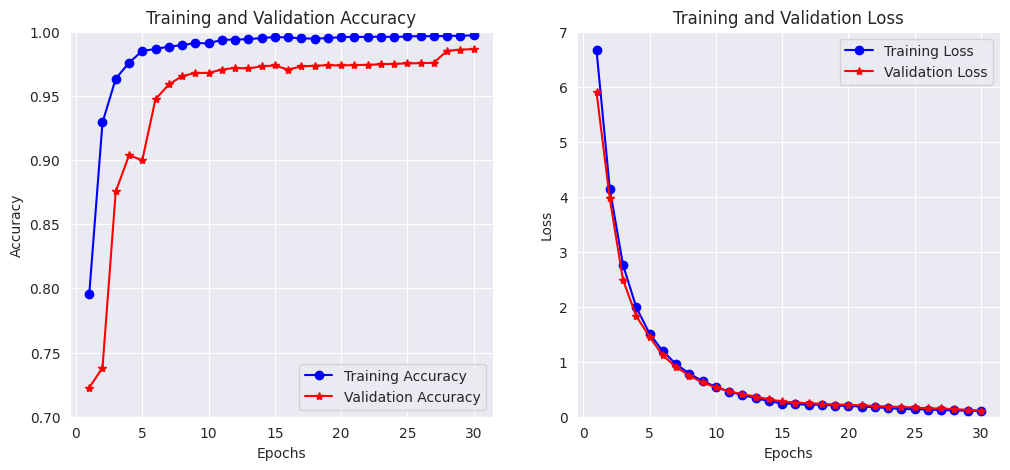

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Epochs
epochs = range(1, 31)  # Since you provided 17 values for accuracy and loss

# Training and validation accuracy and loss over the epochs
train_accuracy = [0.7955, 0.9293, 0.9634, 0.9758, 0.9851, 0.9865, 0.9884, 0.9895, 0.9912, 0.9909, 0.9937, 0.9939, 0.9942, 0.9951, 0.9958, 0.9956, 0.9948, 0.9946, 0.9950, 0.9958, 0.9960, 0.9959, 0.9962, 0.9958, 0.9963, 0.9966, 0.9965, 0.9967, 0.9969, 0.9971]
val_accuracy = [0.7227, 0.7381, 0.8755, 0.9037, 0.8999, 0.9474, 0.9589, 0.9653, 0.9679, 0.9679, 0.9705, 0.9718, 0.9714, 0.9730, 0.9737, 0.9705, 0.9730, 0.9735, 0.9739, 0.9737, 0.9740, 0.9742, 0.9746, 0.9750, 0.9753, 0.9755, 0.9758, 0.9851,0.9860,0.9865]

train_loss = [6.6637, 4.1480, 2.7591, 1.9886, 1.5116, 1.1918, 0.9566, 0.7850, 0.6465, 0.5453, 0.4567, 0.3951, 0.3364, 0.2846, 0.2403, 0.2340, 0.2135, 0.2215, 0.2012, 0.1978, 0.1832, 0.1749, 0.1578, 0.1419,0.1379, 0.1302,0.1215,0.1145, 0.1107, 0.1023]
val_loss = [5.9025, 3.9677, 2.4873, 1.8277, 1.4547, 1.1157, 0.9054, 0.7463, 0.6238, 0.5332, 0.4612, 0.4101, 0.3660, 0.3178, 0.2776, 0.2566, 0.2444, 0.2345, 0.2214,0.2167, 0.2056, 0.1945, 0.1837, 0.1768, 0.1689, 0.1521, 0.1498, 0.1377, 0.1239, 0.1126]

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # Set y-axis limits to show the range of accuracy
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.0, 7.0)  # Set y-axis limits to show the range of loss
plt.legend()

plt.show()


In [ ]:
plot_training(history)

Score on valid and test datasets

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = ensemble_model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = ensemble_model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = ensemble_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

 Confussion Matrix

In [33]:
y_pred = ensemble_model.predict(test_gen)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = test_gen.classes

19/19 [==============================] - 123s 6s/step


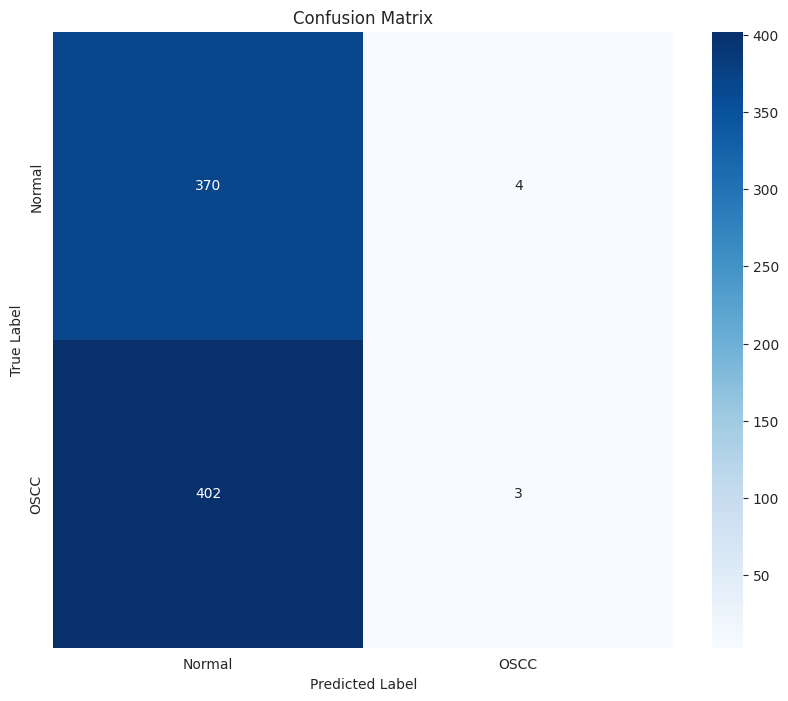

In [34]:
class_names = list(test_gen.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Classification Report

In [35]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Classification report
print(classification_report(y_true_labels, y_pred_labels, target_names= classes))

              precision    recall  f1-score   support

      Normal       0.48      0.99      0.65       374
        OSCC       0.43      0.01      0.01       405

    accuracy                           0.48       779
   macro avg       0.45      0.50      0.33       779
weighted avg       0.45      0.48      0.32       779



Save the model

In [36]:
import pickle

# Save the model using pickle
with open(os.path.join(checkpoint_path, 'my_model.pkl'), 'wb') as f:
    pickle.dump(ensemble_model, f)